In [1]:
import matplotlib.pylab as pl
%matplotlib inline
import cPickle as pickle

In [2]:
def average_top_k(table, k):
    return sum(sorted(table)[len(table) - k:]) / float(k)

In [3]:
optimum = {}
for hidden in 20, 50, 100:
    path_format = 'info/retrieval-hidden-%d-lr-%6f-info'
    tables = tuple(pickle.load(open(path_format % (hidden, lr), 'rb')) for lr in (0.03, 0.02, 0.01, 0.008))
    optimum[hidden] = max(tables, key=(lambda table : average_top_k(table[0], 5)))

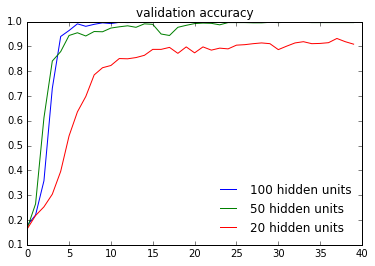

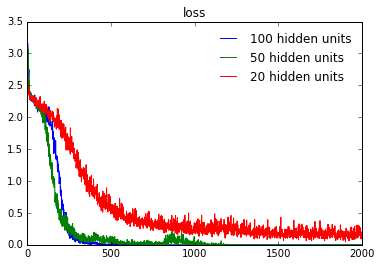

In [4]:
pl.figure()
pl.title('validation accuracy')
for key, value in optimum.items():
    validation_accuracy_table, _ = value
    pl.plot(range(len(validation_accuracy_table)), validation_accuracy_table, label='%d hidden units' % key)
    pl.legend(framealpha=0, loc=0)
pl.figure()
pl.title('loss')
for key, value in optimum.items():
    _, loss_table = value
    pl.plot(range(len(loss_table)), loss_table, label='%d hidden units' % key)
    pl.legend(framealpha=0, loc=0)